# 范例1 - 结构化数据的建模流程

In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras import models,layers

dir_data = "/home/sq/data/eat_tensorflow2_in_30_days"
name_data = "titanic"
dir_titanic = os.path.join(dir_data, name_data)

train_csv = "train.csv"
test_csv = "test.csv"

path_train = os.path.join(dir_titanic, train_csv)
path_test = os.path.join(dir_titanic, test_csv)

df_train_raw = pd.read_csv(path_train)
df_test_raw = pd.read_csv(path_test)

df_train_raw.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
5,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
6,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
7,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
8,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
9,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S


**字段说明**：
- Survived:0代表死亡，1代表存活【y标签】
- Pclass:乘客所持票类，有三种值(1,2,3) 【转换成onehot编码】
- Name:乘客姓名 【舍去】
- Sex:乘客性别 【转换成bool特征】
- Age:乘客年龄(有缺失) 【数值特征，添加“年龄是否缺失”作为辅助特征】
- SibSp:乘客兄弟姐妹/配偶的个数(整数值) 【数值特征】
- Parch:乘客父母/孩子的个数(整数值)【数值特征】
- Ticket:票号(字符串)【舍去】
- Fare:乘客所持票的价格(浮点数，0-500不等) 【数值特征】
- Cabin:乘客所在船舱(有缺失) 【添加“所在船舱是否缺失”作为辅助特征】
- Embarked:乘客登船港口:S、C、Q(有缺失)【转换成onehot编码，四维度 S,C,Q,nan】


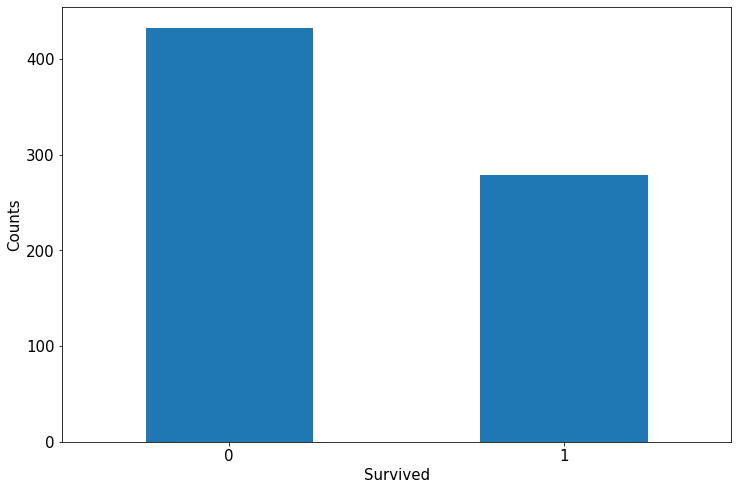

In [2]:
# %matplotlib inline
# %config InlineBackend.figure_format = 'png'
# 乘客存活统计
ax = df_train_raw['Survived'].value_counts().plot(kind='bar', figsize=(12, 8), fontsize=15, rot=0)
ax.set_ylabel('Counts',fontsize = 15)
ax.set_xlabel('Survived',fontsize = 15)
plt.show()

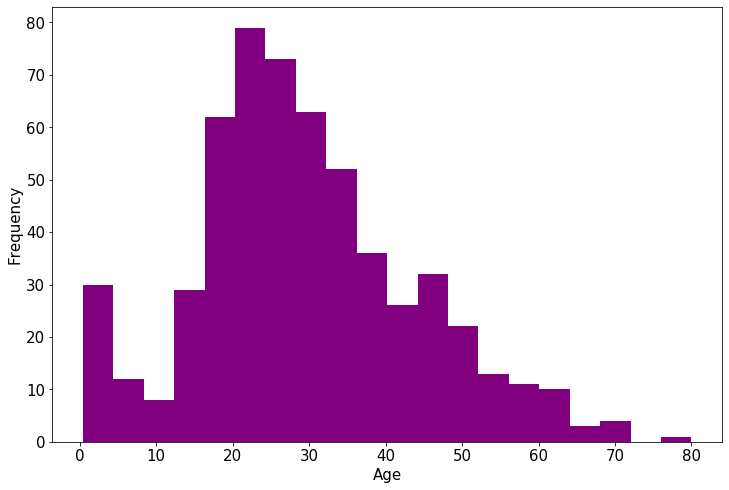

In [3]:
# 乘客年龄分布
ax = df_train_raw['Age'].plot(kind='hist', bins=20, color='purple', figsize=(12, 8), fontsize=15)

ax.set_ylabel('Frequency',fontsize = 15)
ax.set_xlabel('Age',fontsize = 15)
plt.show()

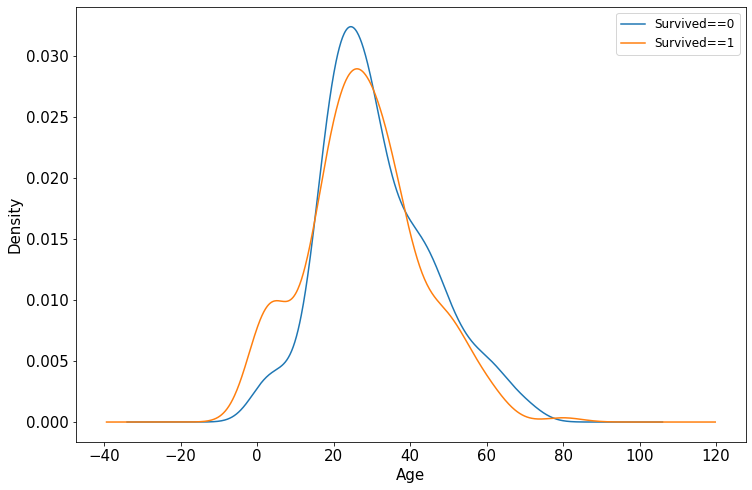

In [4]:
# 年龄 和 label(是否存活) 的相关性
ax = df_train_raw.query('Survived == 0')['Age'].plot(kind = 'density', figsize = (12,8),fontsize=15)
df_train_raw.query('Survived == 1')['Age'].plot(kind = 'density', figsize = (12,8),fontsize=15)
ax.legend(['Survived==0','Survived==1'],fontsize = 12)
ax.set_ylabel('Density', fontsize = 15)
ax.set_xlabel('Age', fontsize = 15)
plt.show()

In [5]:
def preprocessing(df_data):
    df_result = pd.DataFrame()

    # Pclass
    df_pclass = pd.get_dummies(df_data['Pclass'])
    df_pclass.columns = ['Pclass_' + str(x) for x in df_pclass.columns]
    df_result = pd.concat([df_result, df_pclass], axis=1)

    # Sex
    df_sex = pd.get_dummies(df_data['Sex'])
    df_result = pd.concat([df_result, df_sex], axis=1)

    # Age
    df_result['Age'] = df_data['Age'].fillna(0)
    df_result['Age_null'] = pd.isna(df_data['Age']).astype('int32')

    # SibSp,Parch,Fare
    df_result['SibSp'] = df_data['SibSp']
    df_result['Parch'] = df_data['Parch']
    df_result['Fare'] = df_data['Fare']

    # Carbin
    df_result['Cabin_null'] = pd.isna(df_data['Cabin']).astype('int32')

    # Embarked
    df_embarked = pd.get_dummies(df_data['Embarked'], dummy_na=True)
    df_embarked.columns = ['Embarked_' + str(x) for x in df_embarked.columns]
    df_result = pd.concat([df_result, df_embarked], axis=1)

    return (df_result)

x_train = preprocessing(df_train_raw)
y_train = df_train_raw['Survived'].values

x_test = preprocessing(df_test_raw)
y_test = df_test_raw['Survived'].values

print("x_train.shape =", x_train.shape)
print("x_test.shape =", x_test.shape)

x_train.shape = (712, 15)
x_test.shape = (179, 15)


In [6]:
x_train.head()

,Pclass_1,Pclass_2,Pclass_3,female,male,Age,Age_null,SibSp,Parch,Fare,Cabin_null,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,0,0,1,55.0,0,0,0,30.5000,0,0,0,1,0
1,1,0,0,1,0,49.0,0,1,0,76.7292,0,1,0,0,0
2,0,1,0,1,0,36.0,0,0,0,13.0000,1,0,0,1,0
3,0,1,0,0,1,19.0,0,0,0,13.0000,1,0,0,1,0
4,0,0,1,0,1,14.0,0,4,1,39.6875,1,0,0,1,0


In [7]:
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(20,activation = 'relu',input_shape=(15,)))
model.add(layers.Dense(10,activation = 'relu' ))
model.add(layers.Dense(1,activation = 'sigmoid' ))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 二分类问题选择二元交叉熵损失函数
model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['AUC'])

history = model.fit(x_train,y_train,
                    batch_size= 64,
                    epochs= 30,
                    validation_split=0.2 #分割一部分训练数据用于验证
                   )

Train on 569 samples, validate on 143 samples
Epoch 1/30
569/569 [==============================] - 2s 3ms/sample - loss: 1.4450 - AUC: 0.5339 - val_loss: 1.1096 - val_AUC: 0.5218
Epoch 2/30
569/569 [==============================] - 0s 65us/sample - loss: 0.9825 - AUC: 0.4258 - val_loss: 0.8427 - val_AUC: 0.4235
Epoch 3/30
569/569 [==============================] - 0s 64us/sample - loss: 0.8572 - AUC: 0.3894 - val_loss: 0.7710 - val_AUC: 0.4869
Epoch 4/30
569/569 [==============================] - 0s 63us/sample - loss: 0.7674 - AUC: 0.5159 - val_loss: 0.7459 - val_AUC: 0.5718
Epoch 5/30
569/569 [==============================] - 0s 60us/sample - loss: 0.7276 - AUC: 0.5864 - val_loss: 0.7131 - val_AUC: 0.5996
Epoch 6/30
569/569 [==============================] - 0s 55us/sample - loss: 0.6898 - AUC: 0.6048 - val_loss: 0.6691 - val_AUC: 0.6098
Epoch 7/30
569/569 [==============================] - 0s 53us/sample - loss: 0.6563 - AUC: 0.6331 - val_loss: 0.6424 - val_AUC: 0.6498
Epoch 8/30

In [9]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()


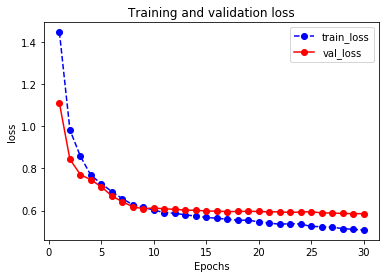

In [10]:
plot_metric(history,"loss")

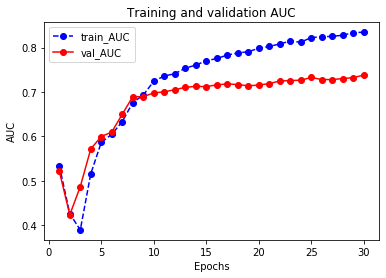

In [12]:
plot_metric(history, "AUC")

In [13]:
model.evaluate(x = x_test,y = y_test)

179/179 [==============================] - 0s 85us/sample - loss: 0.5333 - AUC: 0.7666


[0.5332609554908795, 0.7665572]

In [14]:
#预测概率
model.predict(x_test[0:10])

array([[0.13167526],
       [0.43460065],
       [0.4246628 ],
       [0.77256924],
       [0.5109924 ],
       [0.46323982],
       [0.20433806],
       [0.70339876],
       [0.45685714],
       [0.2319394 ]], dtype=float32)